In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import time
import tqdm
from sklearn.preprocessing import LabelEncoder

In [74]:
lpoint = pd.read_csv('data_regression.csv',dtype={"CLNT_ID": np.str})
print( lpoint.shape )
lpoint.head() # 67만명 

(671470, 52)


,CLNT_ID,HITS_SEQ,PD_BUY_AM,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,0000008,57.000000,38000.000000,4.5,46.500000,417.000000,0.0,2.0,0,0.0,...,0,0,0,0,0,0,2,0,M,20
1,0000014,284.000000,34900.000000,5.0,256.000000,7098.000000,0.0,2.0,0,0.0,...,0,0,0,0,0,0,2,0,F,30
2,0000032,58.000000,15360.000000,101.4,98.200000,2169.000000,0.0,5.0,0,5.0,...,0,0,0,0,0,0,5,0,M,40
3,0000056,47.333333,7933.333333,82.0,45.666667,1157.666667,0.0,3.0,0,3.0,...,0,0,0,0,1,0,0,2,F,40
4,0000058,209.000000,21850.000000,8.0,195.000000,3161.000000,0.0,6.0,0,6.0,...,0,1,0,0,0,0,5,0,F,30


In [78]:
number = LabelEncoder()
lpoint['CLNT_GENDER'] = number.fit_transform(lpoint['CLNT_GENDER'].astype('str'))
lpoint['CLNT_AGE'] = number.fit_transform(lpoint['CLNT_AGE'].astype('str'))
lpoint = lpoint.sort_values(by=['CLAC0_8'],ascending=False)
lpoint.head(100)

,CLNT_ID,HITS_SEQ,PD_BUY_AM,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
469036,4736937,133.599556,58082.181357,945.873811,234.601776,1459.865885,0.0,3154.0,0,0.0,...,0,0,0,0,0,0,3154,0,0,3
206484,2075522,244.138478,255812.939245,138.885605,421.722496,3845.622879,0.0,1827.0,0,1827.0,...,0,6,0,0,0,2,1779,39,0,5
75611,0748826,115.172870,13090.562448,1410.439206,210.175352,1468.346567,0.0,1209.0,0,1204.0,...,0,5,1,0,0,1,1212,13,0,4
491467,4964593,135.963521,53397.541634,865.095956,219.737510,3398.679619,0.0,1261.0,0,0.0,...,0,43,0,0,214,2,956,53,0,3
643989,6366359,89.511509,70995.332481,1272.771100,163.433504,1502.520460,0.0,782.0,0,203.0,...,0,0,0,0,0,0,952,11,0,2
608012,6072971,234.803324,243614.958449,431.415512,422.903047,3227.030471,0.0,722.0,0,722.0,...,0,0,0,0,0,0,716,5,0,5
508974,5142305,157.899029,60612.873786,633.233981,346.353398,2112.133981,0.0,1030.0,0,0.0,...,0,52,3,0,36,42,678,211,0,3
556853,5628642,245.585546,244048.672566,155.334808,441.150442,3282.871681,0.0,678.0,0,677.0,...,0,0,0,0,0,0,675,2,0,5
342087,3447474,240.208075,248027.795031,31.447205,432.720497,3129.122671,0.0,644.0,0,644.0,...,0,0,0,0,0,0,644,0,0,5
39906,0385420,119.827957,22836.129032,49.903226,222.440860,2234.129032,0.0,93.0,0,0.0,...,0,4,0,0,0,0,576,0,0,4


In [65]:
lpoint['CLAC0_8'].value_counts()[:30]  # 전체 67만명 중 약 50%가 패션의류 구매

0     294405
2     105146
1      91843
3      49352
4      32131
5      19799
6      14672
7      10364
8       8152
9       6108
10      5236
11      4197
12      3519
13      2865
14      2405
15      2051
16      1880
17      1568
18      1365
19      1197
20      1140
21      1001
22       828
23       766
24       755
25       599
26       585
27       554
28       477
30       416
Name: CLAC0_8, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1be065ac860>,
 'caps': [<matplotlib.lines.Line2D at 0x1be065ac390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1be0abe59e8>],
 'medians': [<matplotlib.lines.Line2D at 0x1be065b74e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1be065b7940>],
 'means': []}

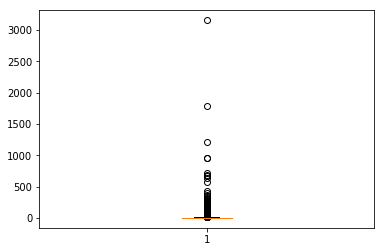

In [76]:
plt.boxplot(lpoint['CLAC0_8'])

In [90]:
lpoint = lpoint[10:]

In [5]:
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
lpoint.columns

Index(['CLNT_ID', 'HITS_SEQ', 'PD_BUY_AM', 'SESS_SEQ', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9',
       'CLNT_GENDER', 'CLNT_AGE'],
      dtype='object')

In [80]:
Xvariable = ['HITS_SEQ', 'PD_BUY_AM', 'SESS_SEQ', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend','CLNT_GENDER', 'CLNT_AGE']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(lpoint[Xvariable], lpoint['CLAC0_8'], test_size=0.3)

In [92]:
# Statsmodel.Api Method
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit()

In [93]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                CLAC0_8   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 3.410e+04
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:32:38   Log-Likelihood:            -1.2665e+06
No. Observations:              470015   AIC:                         2.533e+06
Df Residuals:                  469978   BIC:                         2.533e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
HITS_SEQ                  0.00

In [94]:
y_predict = result1.predict(x_train)
pd.DataFrame({'predict':list(y_predict.values),'actual':list(y_train.values)}).sort_values(by=['predict'],ascending=False).head(20)

,predict,actual
172793,336.715448,36
373290,319.962215,215
44764,256.129571,238
274124,243.856140,36
442759,233.992357,128
173746,230.416176,193
114726,179.014693,246
438146,166.380442,190
342018,160.199243,49
449091,157.918274,265


In [95]:
# Sci-Kit Learn Method
model2 = LinearRegression()
result2 = model2.fit(x_train, y_train)

In [96]:
y_hat = result2.predict(x_train)

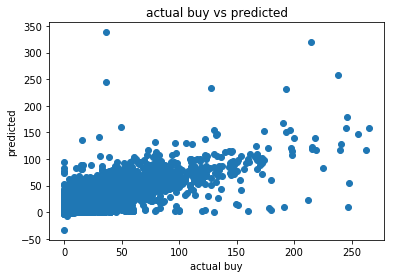

In [100]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_hat)
plt.xlabel("actual buy")
plt.ylabel("predicted")
plt.title("actual buy vs predicted")
plt.show()